### Date: 26 May 2020
# Name: Arjun Kumar 
# Email: Karnarjun2000@gmail.com
# -----------------------------------------------------------------------------------------------------------

This dataset has funding information of the Indian startups from January 2015 to August 2017.
Feature Details :
SNo - Serial number.
Date - Date of funding in format DD/MM/YYYY.
StartupName - Name of the startup which got funded.
IndustryVertical - Industry to which the startup belongs.
SubVertical - Sub-category of the industry type.
CityLocation - City which the startup is based out of.
InvestorsName - Name of the investors involved in the funding round.
InvestmentType - Either Private Equity or Seed Funding.
AmountInUSD - Funding Amount in USD.
Remarks - Other information, if any.
Insights -
Find out what type of startups are getting funded in the last few years?
Who are the important investors?
What are the hot fields that get a lot of funding these days?
Dataset link: https://drive.google.com/file/d/1UaWCHLBZpxCmTSrmQQ5RXM5OMay17z8V/view

## 1

#### Aim: To Find best suited place among NCR(New Delhi+Noida+Gurgaon), Bangalore and Mumbai for Startup.

#### Way: Finding the total Number of Funding got in cities and then Select top Cities among NCR, Bangalore and Mumbai.



  CityLocation  Number of Funding
0          NCR                703
1    Bangalore                635
2       Mumbai                449

Best place is  NCR


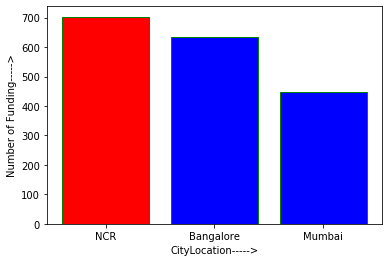

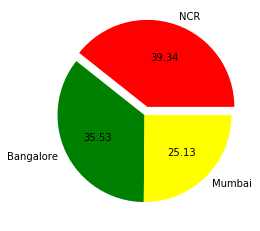

In [60]:
import pandas as pd
df=pd.read_csv("Downloads\startup_funding.csv")
df=df[["CityLocation"]]
df.dropna(inplace=True)#Removing the Non values
df["CityLocation"].replace("Delhi","New Delhi",inplace=True)#Correction in the wrong written name
df["CityLocation"].replace("New Delhi","NCR",inplace=True)
df["CityLocation"].replace("Noida","NCR",inplace=True)
df["CityLocation"].replace("Gurgaon","NCR",inplace=True)

df["CityLocation"].replace("bangalore","Bangalore",inplace=True)#care about only "CityLocation"
def separate_indianCity(a):#This function is for separating international city included together with Indian city
    a=a.split('/')
    a=a[0].strip()
    return a
    
df["CityLocation"]=df["CityLocation"].apply(separate_indianCity)
df=df["CityLocation"].value_counts().sort_values(ascending=False)[0:3]# arranging in desceding order to select top 5 investors
a=pd.DataFrame(df.index,columns=["CityLocation"])
a["Number of Funding"]=df.values


print(a)# output for Number of funding in described cities.
print()
print("Best place is ",a["CityLocation"].iloc[0])


import matplotlib.pyplot as plt
colrs=["red","blue","blue"]
plt.bar(df.index,df.values,color=colrs,edgecolor="green")
plt.xlabel("CityLocation----->")
plt.ylabel("Number of Funding----->")

plt.show()
plt.pie(df.values,labels=df.index,autopct="%.2f",explode=[0.1,0,0],colors=["red","green","yellow"])
plt.show()



#### As NCR has maximum number of Funding ie. 703.  So NCR is best place for startup. Care is taken that NCR includes New Delhi, Noida, Gurgaon. If individually taken then Banglore would be most suited place

# **------------------------------------------------------------------------------------------------------**

## 2

#### Aim: To Find the top 5 Investors who has invested maximum Number of time in Startups.

#### Way: First Finding the Number of Times  every Investors invested and then select top 5 Investors.


              Investors  No. of Times Invested
0       Sequoia Capital                     64
1        Accel Partners                     53
2       Kalaari Capital                     44
3         SAIF Partners                     41
4  Indian Angel Network                     40


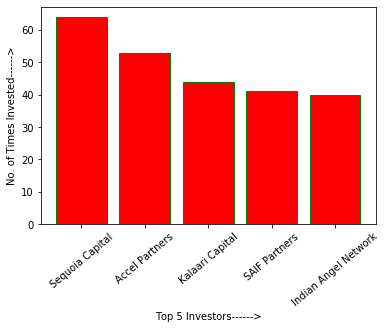

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("Downloads\startup_funding.csv")
df=df[["InvestorsName"]]#caring about only InvestorName column
df.dropna(inplace=True)# removing the non values
a=df["InvestorsName"].values
c=[]
for i in a:
    i=i.split(',')
    for j in i:
        j=j.strip()
        c.append(j)

        
a=pd.Series(c)
a=a.value_counts().sort_values(ascending=False)[0:5]# arranging in desceding order to select top 5 investors
df=pd.DataFrame(a.index,columns=["Investors"])
df["No. of Times Invested"]=a.values
print(df)# Top 5 Investors with Number of times they Invested
plt.bar(df["Investors"],df["No. of Times Invested"],color="red",edgecolor="green")
plt.xticks(rotation=40)
plt.xlabel("Top 5 Investors------>")
plt.ylabel("No. of Times Invested------>")

plt.show()




#### Above is top 5 investors, so these investors can be contacted for help as Fund.

# -----------------------------------------------------------------------------------------------------------

## 3

#### Aim: To Find the top 5 Investors who has invested maximum Number of time in Different Startups.

#### Way: First Finding the Number of Times every Investors invested in Different Startups and then select top 5 Investors.



        Top 5 Investors  No. of Investment in Different Startup
0       Sequoia Capital                                      48
1        Accel Partners                                      47
2       Kalaari Capital                                      41
3  Indian Angel Network                                      40
4        Blume Ventures                                      36


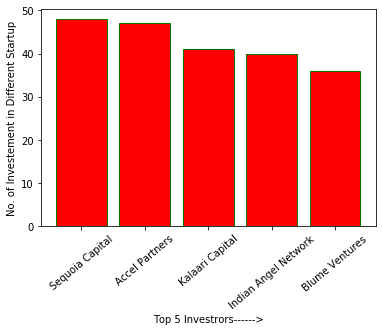

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("Downloads\startup_funding.csv")


df["StartupName"].replace("Olacabs","Ola",inplace=True)
df["StartupName"].replace("Ola Cabs","Ola",inplace=True)
df["StartupName"].replace("Flipkart.com","Flipkart",inplace=True)
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace=True)
df["StartupName"].replace("Oyo Rooms","Oyo",inplace=True)
df["StartupName"].replace("Oyorooms","Oyo",inplace=True)
df["StartupName"].replace("OyoRooms","Oyo",inplace=True)
df["StartupName"].replace("OYo Rooms","Oyo",inplace=True)
df["StartupName"].replace("OYO Rooms","Oyo",inplace=True)
df=df[["StartupName","InvestorsName"]]
df.dropna(inplace=True)
startup_name=list(df["StartupName"].values)
investor_name=list(df["InvestorsName"].values)


i=0

while i<len(investor_name):
    if(',' in investor_name[i]):
        a=investor_name[i].split(',')# making list of investors if there are many investors for single startup in the same row of csv file
        
        j=i
        investor_name[j]=a[0]
        j=j+1
        for k in range(1,len(a)):# ungrouping the grouped investors to corresponding startup, so that it be easy to count for single investor investing in different startup
            
            investor_name.insert(j,a[k].strip())
            startup_name.insert(j,startup_name[i])
            j=j+1
        i=i+len(a)-1
    i=i+1
f=[]
for i in range(len(startup_name)):
    f.append(investor_name[i]+"="+startup_name[i])# f appends string as investor_name and startup_name separated by'=', so that common value can be removed by making it into set data-type
f=list(set(f))# removing the common value so that for same startup company, it couldnot count the same investors
k=[]
l=[]
for i in f:
    i=i.split('=')# separating investor_name from startup_name which was joined in list 'f'
    k.append(i[0].strip())

se=pd.Series(k)# series of investor name . So here finally we have removed the more than one occurance of Investors name which is investing more than once in same startup


a=se.value_counts().sort_values(ascending=False)
a.drop("",inplace=True)
a=a[0:5]# printing top five investors with their number of investment in different startup


df=pd.DataFrame(a.index,columns=["Top 5 Investors"])
df["No. of Investment in Different Startup"]=a.values
print(df)
plt.bar(a.index,a.values,color="red",edgecolor="green")
plt.xticks(rotation=40)
plt.xlabel("Top 5 Investrors------>")
plt.ylabel("No. of Investement in Different Startup")
plt.show()

#### Above is The Top Five Investor who has Invested in Different Startup. 

# -----------------------------------------------------------------------------------------------------------

## 4

#### Aim: To Find the top 5 Investors who has invested maximum Number of time in Different Startups as Seed Funding or Crowd Funding.

#### Way: First Finding the Number of Times every Investors invested in Different Startups as Seed Funding or Crowd Funding, then select top 5 Investors.

            Top 5 Investors  No. of Investment as Crowd Fund or Seed Fund
0      Indian Angel Network                                            33
1             Rajan Anandan                                            23
2               LetsVenture                                            16
3             Anupam Mittal                                            16
4                Kunal Shah                                            14
5  Group of Angel Investors                                            14


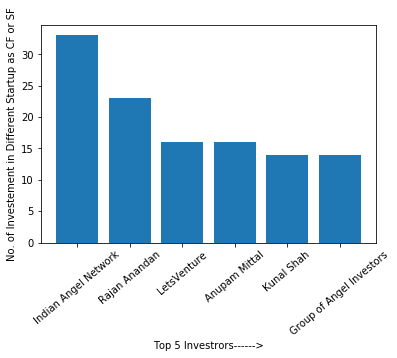

In [56]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("Downloads\startup_funding.csv")


df["StartupName"].replace("Olacabs","Ola",inplace=True)
df["StartupName"].replace("Ola Cabs","Ola",inplace=True)
df["StartupName"].replace("Flipkart.com","Flipkart",inplace=True)
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace=True)
df["StartupName"].replace("Oyo Rooms","Oyo",inplace=True)
df["StartupName"].replace("Oyorooms","Oyo",inplace=True)
df["StartupName"].replace("OyoRooms","Oyo",inplace=True)
df["StartupName"].replace("OYo Rooms","Oyo",inplace=True)
df["StartupName"].replace("OYO Rooms","Oyo",inplace=True)
df["InvestmentType"].replace("PrivateEquity","Private Equity",inplace=True)
df["InvestmentType"].replace("SeedFunding","Seed Funding",inplace=True)
df["InvestmentType"].replace("Crowd funding","Crowd Funding",inplace=True)

a=df[df.InvestmentType=="Seed Funding"]
b=df[ df.InvestmentType=="Crowd Funding"]
df=a.append(b)
df=df[["StartupName","InvestorsName"]]
df.dropna(inplace=True)

startup_name=list(df["StartupName"].values)
investor_name=list(df["InvestorsName"].values)


i=0

while i<len(investor_name):
    if(',' in investor_name[i]):
        a=investor_name[i].split(',')# making list of investors if there are many investors for single startup in the same row of csv file
        
        j=i
        investor_name[j]=a[0]
        j=j+1
        for k in range(1,len(a)):# ungrouping the grouped investors to corresponding startup, so that it be easy to count for single investor investing in different startup
            
            investor_name.insert(j,a[k].strip())
            startup_name.insert(j,startup_name[i])
            j=j+1
        i=i+len(a)-1
    i=i+1
f=[]
for i in range(len(startup_name)):
    f.append(investor_name[i]+"="+startup_name[i])# f appends string as investor_name and startup_name separated by'=', so that common value can be removed by making it into set data-type
f=list(set(f))# removing the common value so that for same startup company, it couldnot count the same investors
k=[]
l=[]
for i in f:
    i=i.split('=')# separating investor_name from startup_name which was joined in list 'f'
    k.append(i[0].strip())

se=pd.Series(k)# series of investor name . So here finally we have removed the more than one occurance of Investors name which is investing more than once in same startup


a=se.value_counts().sort_values(ascending=False)
a.drop("",inplace=True)
a.drop("Undisclosed Investors",inplace=True)
a.drop("Undisclosed investors",inplace=True)

a=a[0:6]



df=pd.DataFrame(a.index,columns=["Top 5 Investors"])
df["No. of Investment as Crowd Fund or Seed Fund"]=a.values
print(df)# printing top five investors with their number of investment in different startup for Seed Funding and Crowd Funding
plt.bar(a.index,a)
plt.xticks(rotation=40)
plt.xlabel("Top 5 Investrors------>")
plt.ylabel("No. of Investement in Different Startup as CF or SF")
plt.show()

#### Above is The Top Five Investor who has Invested in Different Startup under only Crowd Funding or Seed Funding. Actuall there are six Investors in top five with Kunal shah and Group of Angel Investors with same number of Investment

# -----------------------------------------------------------------------------------------------------------


## 5

#### Aim: To Find the top 5 Investors who has invested maximum Number of time in Different Startups as Private Equity.

#### Way: First Finding the Number of Times every Investors invested in Different Startups as Private Equity, and then select top 5 Investors.

   Top 5 Investors  No. of Investment as Private Equity
0  Sequoia Capital                                   45
1   Accel Partners                                   43
2  Kalaari Capital                                   35
3   Blume Ventures                                   27
4    SAIF Partners                                   24


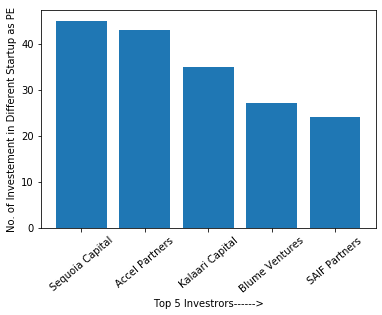

In [55]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv("Downloads\startup_funding.csv")


df["StartupName"].replace("Olacabs","Ola",inplace=True)
df["StartupName"].replace("Ola Cabs","Ola",inplace=True)
df["StartupName"].replace("Flipkart.com","Flipkart",inplace=True)
df["StartupName"].replace("Paytm Marketplace","Paytm",inplace=True)
df["StartupName"].replace("Oyo Rooms","Oyo",inplace=True)
df["StartupName"].replace("Oyorooms","Oyo",inplace=True)
df["StartupName"].replace("OyoRooms","Oyo",inplace=True)
df["StartupName"].replace("OYo Rooms","Oyo",inplace=True)
df["StartupName"].replace("OYO Rooms","Oyo",inplace=True)
df["InvestmentType"].replace("PrivateEquity","Private Equity",inplace=True)
df["InvestmentType"].replace("SeedFunding","Seed Funding",inplace=True)
df["InvestmentType"].replace("Crowd funding","Crowd Funding",inplace=True)

df=df[df.InvestmentType=="Private Equity"]
df=df[["StartupName","InvestorsName"]]
df.dropna(inplace=True)

startup_name=list(df["StartupName"].values)
investor_name=list(df["InvestorsName"].values)


i=0

while i<len(investor_name):# From here coding is similar as above in solutio of 4 and 3.
    if(',' in investor_name[i]):
        a=investor_name[i].split(',')
        
        j=i
        investor_name[j]=a[0]
        j=j+1
        for k in range(1,len(a)):
            
            investor_name.insert(j,a[k].strip())
            startup_name.insert(j,startup_name[i])
            j=j+1
        i=i+len(a)-1
    i=i+1
f=[]
for i in range(len(startup_name)):
    f.append(investor_name[i]+"="+startup_name[i])
f=list(set(f))
k=[]
l=[]
for i in f:
    i=i.split('=')
    k.append(i[0].strip())

se=pd.Series(k)


a=se.value_counts().sort_values(ascending=False)
a.drop("",inplace=True)
a.drop("Undisclosed Investors",inplace=True)
a.drop("Undisclosed investors",inplace=True)

a=a[0:5]
df=pd.DataFrame(a.index,columns=["Top 5 Investors"])
df["No. of Investment as Private Equity"]=a.values
print(df)
plt.bar(a.index,a)
plt.xticks(rotation=40)
plt.xlabel("Top 5 Investrors------>")
plt.ylabel("No. of Investement in Different Startup as PE")
plt.show()